In [1]:
import pandas as pd

In [2]:
a=pd.read_csv(r"C:\Users\91935\Downloads\airquality.csv")

In [3]:
a.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,medium
2,3,12.0,149.0,12.6,74,5,3,low
3,4,18.0,313.0,11.5,62,5,4,medium
4,5,NaN,NaN,14.3,56,5,5,low


In [4]:
a.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
148,149,30.0,193.0,6.9,70,9,26,low
149,150,NaN,145.0,13.2,77,9,27,NaN
150,151,14.0,191.0,14.3,75,9,28,low
151,152,18.0,131.0,8.0,76,9,29,NaN
152,153,20.0,223.0,11.5,68,9,30,low


In [5]:
#data cleaning

In [6]:
a.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
Humidity      72
dtype: int64

In [7]:
#drop unwanted columns

In [8]:
a=a.drop(columns=['Unnamed: 0'])

In [9]:
#replace null values

In [10]:
a['Ozone']=a['Ozone'].fillna(a['Ozone'].mean())

In [11]:
a['Solar.R']=a['Solar.R'].fillna(a['Solar.R'].mean())

In [12]:
a['Humidity']=a['Humidity'].fillna(a['Humidity'].mode()[0])

In [13]:
a

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,high
1,36.00000,118.000000,8.0,72,5,2,medium
2,12.00000,149.000000,12.6,74,5,3,low
3,18.00000,313.000000,11.5,62,5,4,medium
4,42.12931,185.931507,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,low
149,42.12931,145.000000,13.2,77,9,27,low
150,14.00000,191.000000,14.3,75,9,28,low
151,18.00000,131.000000,8.0,76,9,29,low


In [14]:
#data integration

In [15]:
x=a.iloc[:,[0,3]]

In [16]:
x

,Ozone,Temp
0,41.00000,67
1,36.00000,72
2,12.00000,74
3,18.00000,62
4,42.12931,56
...,...,...
148,30.00000,70
149,42.12931,77
150,14.00000,75
151,18.00000,76


In [17]:
y=a.iloc[:,[2,3]]

In [18]:
y

,Wind,Temp
0,7.4,67
1,8.0,72
2,12.6,74
3,11.5,62
4,14.3,56
...,...,...
148,6.9,70
149,13.2,77
150,14.3,75
151,8.0,76


In [19]:
integrate_data=pd.merge(x,y,on='Temp',how='inner')

In [20]:
integrate_data

,Ozone,Temp,Wind
0,41.0,67,7.4
1,41.0,67,12.0
2,41.0,67,16.1
3,41.0,67,13.8
4,23.0,67,7.4
...,...,...,...
796,23.0,71,10.9
797,23.0,71,11.5
798,23.0,71,9.2
799,14.0,63,16.6


In [21]:
#data transformation
#lable encoding

In [22]:
from sklearn import preprocessing
a['Humidity']=preprocessing.LabelEncoder().fit_transform(a['Humidity'])
a['Humidity'].unique()

array([1, 3, 2, 0])

In [23]:
a

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,1
1,36.00000,118.000000,8.0,72,5,2,3
2,12.00000,149.000000,12.6,74,5,3,2
3,18.00000,313.000000,11.5,62,5,4,3
4,42.12931,185.931507,14.3,56,5,5,2
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,2
149,42.12931,145.000000,13.2,77,9,27,2
150,14.00000,191.000000,14.3,75,9,28,2
151,18.00000,131.000000,8.0,76,9,29,2


In [24]:
#one hot encoding

In [25]:
one_hot_encoded=pd.get_dummies(a,columns=['Humidity'])
one_hot_encoded=one_hot_encoded.astype(int)
one_hot_encoded

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity_0,Humidity_1,Humidity_2,Humidity_3
0,41,190,7,67,5,1,0,1,0,0
1,36,118,8,72,5,2,0,0,0,1
2,12,149,12,74,5,3,0,0,1,0
3,18,313,11,62,5,4,0,0,0,1
4,42,185,14,56,5,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
148,30,193,6,70,9,26,0,0,1,0
149,42,145,13,77,9,27,0,0,1,0
150,14,191,14,75,9,28,0,0,1,0
151,18,131,8,76,9,29,0,0,1,0


In [26]:
#model building
#variable selection

In [27]:
from sklearn.linear_model import LinearRegression
x1=a[['Wind']]
y1=a[['Temp']]

In [28]:
x1,y1

(     Wind
 0     7.4
 1     8.0
 2    12.6
 3    11.5
 4    14.3
 ..    ...
 148   6.9
 149  13.2
 150  14.3
 151   8.0
 152  11.5
 
 [153 rows x 1 columns],
      Temp
 0      67
 1      72
 2      74
 3      62
 4      56
 ..    ...
 148    70
 149    77
 150    75
 151    76
 152    68
 
 [153 rows x 1 columns])

In [29]:
#split training and testing data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2)

In [31]:
model=LinearRegression().fit(x_train,y_train)

In [32]:
model.intercept_


array([89.54452027])

In [33]:
model.coef_

array([[-1.20416407]])

In [34]:
y_predict=model.predict(x_test)

In [35]:
print(y_predict)

[[84.00536554]
 [71.6024756 ]
 [75.69663344]
 [75.09455141]
 [81.23578817]
 [75.69663344]
 [72.92705608]
 [72.32497404]
 [77.86412877]
 [81.23578817]
 [74.37205296]
 [77.86412877]
 [81.23578817]
 [74.37205296]
 [71.6024756 ]
 [65.34082242]
 [82.68078506]
 [77.86412877]
 [73.64955452]
 [82.68078506]
 [79.9112077 ]
 [77.14163033]
 [80.63370614]
 [72.32497404]
 [81.95828662]
 [77.86412877]
 [72.32497404]
 [80.63370614]
 [75.69663344]
 [75.69663344]
 [81.23578817]]


In [36]:
#plotting

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'TEMPERATURE')

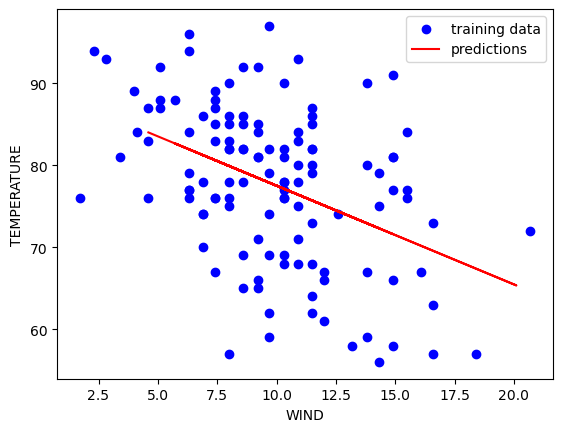

In [38]:
plt.scatter(x_train,y_train,color='blue',label="training data")
plt.plot(x_test.squeeze(),y_predict, color='red',label="predictions")
plt.legend()
plt.xlabel("WIND")
plt.ylabel("TEMPERATURE")

In [39]:
#evaluation

In [40]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)
print(mse)

49.71278623540177
